# Observations
*
*
*

# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_SCC = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mice_SCC

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_SCC_count = len(mice_SCC["Mouse ID"].unique())
mice_SCC_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates = mice_SCC.loc[mice_SCC.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
mouse_duplicate = mouse_duplicates.iloc[0,0]
mouse_duplicate

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mice_SCC.loc[mice_SCC["Mouse ID"] == mouse_duplicate]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study = mice_SCC[mice_SCC["Mouse ID"] != mouse_duplicate]
mice_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_study_count = len(mice_study["Mouse ID"].unique())
mice_study_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mice_by_regimen = mice_study.groupby("Drug Regimen")
tumor_by_regimen = mice_by_regimen["Tumor Volume (mm3)"]
tumor_mean = tumor_by_regimen.mean()
tumor_median = tumor_by_regimen.median()
tumor_var = tumor_by_regimen.var()
tumor_std = tumor_by_regimen.std()
tumor_sem = tumor_by_regimen.sem()

tumor_regimen_stats = pd.DataFrame({"Mean Tumor Volume": tumor_mean, 
                                    "Median Tumor Volume": tumor_median, 
                                    "Tumor Volume Variance": tumor_var, 
                                    "Tumor Volume Std. Dev.": tumor_std, 
                                    "Tymor Volume Std. Err.": tumor_sem})

tumor_regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tymor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

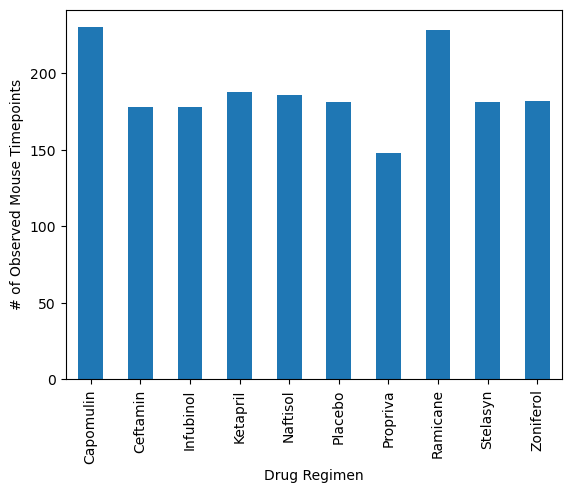

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_by_regimen = mice_by_regimen["Timepoint"].count()

rows_by_regimen.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

plt.show()


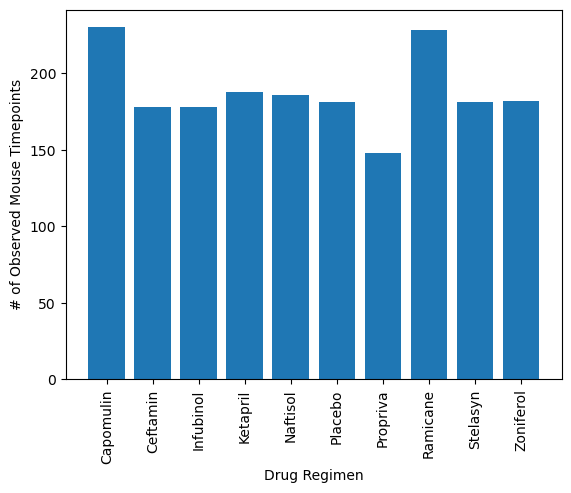

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np

x_axis = np.arange(len(rows_by_regimen))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, rows_by_regimen)
plt.xticks(tick_locations, rows_by_regimen.index, rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

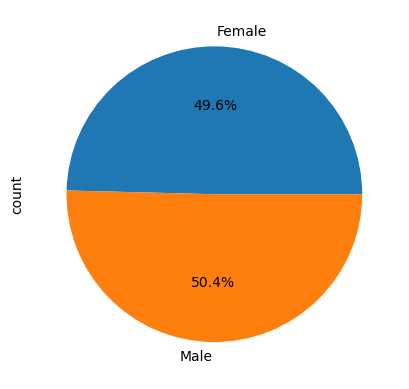

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_gender = mice_study[["Mouse ID", "Sex"]].drop_duplicates()

# Make the pie chart
count_by_sex = mouse_gender.groupby("Sex").count()
count_by_sex["Mouse ID"].plot(kind="pie", autopct="%1.1f%%", ylabel="count")

plt.show()

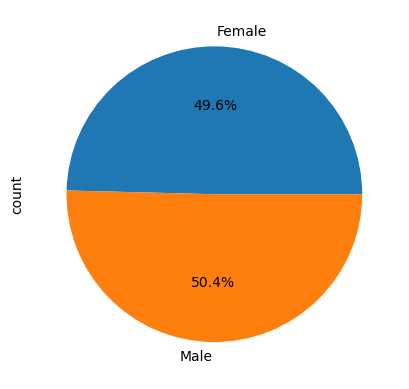

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_gender = mice_study[["Mouse ID", "Sex"]].drop_duplicates()

# Make the pie chart
count_by_sex = mouse_gender.groupby("Sex").count()

labels = ["Female", "Male"]
counts = [count_by_sex["Mouse ID"]["Female"], count_by_sex["Mouse ID"]["Male"]]
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time_byID = pd.DataFrame(mice_study.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_final = pd.merge(final_time_byID, mice_study, on=("Mouse ID", "Timepoint"), how="left")
mice_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index in range(len(mice_final)):
    if mice_final.loc[index, "Drug Regimen"] == "Capomulin":
        capomulin.append(mice_final.loc[index, "Tumor Volume (mm3)"])
    if mice_final.loc[index, "Drug Regimen"] == "Ramicane":
        ramicane.append(mice_final.loc[index, "Tumor Volume (mm3)"])
    if mice_final.loc[index, "Drug Regimen"] == "Infubinol":
        infubinol.append(mice_final.loc[index, "Tumor Volume (mm3)"])
    if mice_final.loc[index, "Drug Regimen"] == "Ceftamin":
        ceftamin.append(mice_final.loc[index, "Tumor Volume (mm3)"])

    # add subset
cap_final = pd.DataFrame(capomulin)
cap_final.rename(columns={0: 'Tumor Volume (mm3)'}, inplace=True)
cap_final_quarts = cap_final.quantile([.25, .5, .75])
cap_final_lq = cap_final_quarts.loc[.25]
cap_final_uq = cap_final_quarts.loc[.75]
cap_final_iqr = cap_final_uq - cap_final_lq
cap_final_lb = cap_final_lq - (1.5 * cap_final_iqr)
cap_final_ub = cap_final_uq + (1.5 * cap_final_iqr)

ram_final = pd.DataFrame(ramicane)
ram_final.rename(columns={0: 'Tumor Volume (mm3)'}, inplace=True)
ram_final_quarts = ram_final.quantile([.25, .5, .75])
ram_final_lq = ram_final_quarts.loc[.25]
ram_final_uq = ram_final_quarts.loc[.75]
ram_final_iqr = ram_final_uq - ram_final_lq
ram_final_lb = ram_final_lq - (1.5 * ram_final_iqr)
ram_final_ub = ram_final_uq + (1.5 * ram_final_iqr)

inf_final = pd.DataFrame(infubinol)
inf_final.rename(columns={0: 'Tumor Volume (mm3)'}, inplace=True)
inf_final_quarts = inf_final.quantile([.25, .5, .75])
inf_final_lq = inf_final_quarts.loc[.25]
inf_final_uq = inf_final_quarts.loc[.75]
inf_final_iqr = inf_final_uq - inf_final_lq
inf_final_lb = inf_final_lq - (1.5 * inf_final_iqr)
inf_final_ub = inf_final_uq + (1.5 * inf_final_iqr)

cef_final = pd.DataFrame(ceftamin)
cef_final.rename(columns={0: 'Tumor Volume (mm3)'}, inplace=True)
cef_final_quarts = cef_final.quantile([.25, .5, .75])
cef_final_lq = cef_final_quarts.loc[.25]
cef_final_uq = cef_final_quarts.loc[.75]
cef_final_iqr = cef_final_uq - cef_final_lq
cef_final_lb = cef_final_lq - (1.5 * cef_final_iqr)
cef_final_ub = cef_final_uq + (1.5 * cef_final_iqr)

cap_outliers = cap_final[(cap_final < cap_final_lb) | (cap_final > cap_final_ub)]
cap_ol = cap_outliers.dropna(how='any')

ram_outliers = ram_final[(ram_final < ram_final_lb) | (ram_final > ram_final_ub)]
ram_ol = ram_outliers.dropna(how='any')

inf_outliers = inf_final[(inf_final < inf_final_lb) | (inf_final > inf_final_ub)]
inf_ol = inf_outliers.dropna(how='any')

cef_outliers = cef_final[(cef_final < cef_final_lb) | (cef_final > cef_final_ub)]
cef_ol = cef_outliers.dropna(how='any')

    # Determine outliers using upper and lower bounds
print(f"Capomulin's potential outliers: {cap_ol.iloc[:, 0]}.")
print(f"Ramicane's potential outliers: {ram_ol.iloc[:, 0]}.")
print(f"Infubinol's potential outliers: {inf_ol.iloc[:, 0]}.")
print(f"Ceftamin's potential outliers: {cef_ol.iloc[:, 0]}.")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


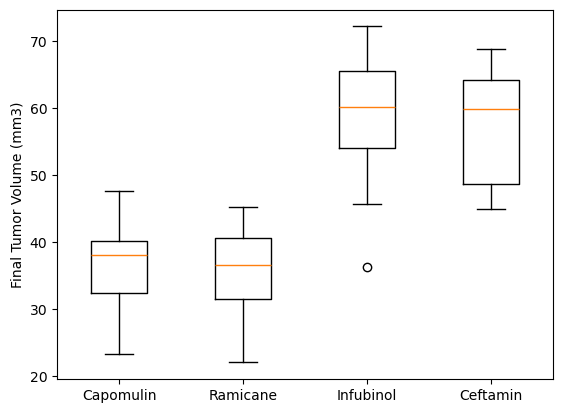

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
drug_final = [cap_final.iloc[:, 0], ram_final.iloc[:, 0], inf_final.iloc[:, 0], cef_final.iloc[:, 0]]
ax.boxplot(drug_final)
ax.set_xticklabels(regimens)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

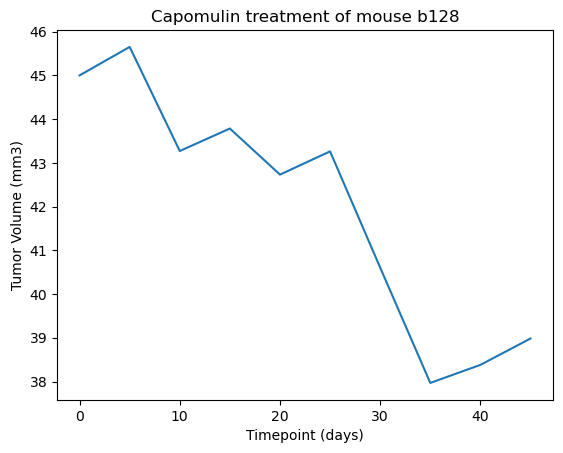

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_study = mice_study.loc[mice_study["Drug Regimen"] == "Capomulin"]
cap_random = np.random.choice(cap_study["Mouse ID"])
random_cap = cap_study.loc[cap_study["Mouse ID"] == cap_random]
random_cap_treatment = random_cap[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
random_cap_treatment.plot(kind="line", xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", title = f"Capomulin treatment of mouse {cap_random}", legend = False)
plt.show()

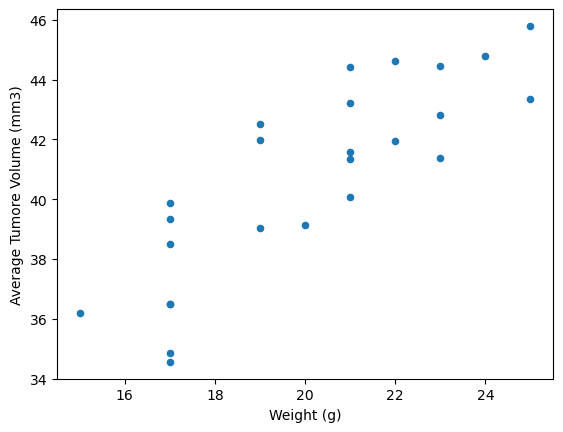

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_avg_tumor = pd.DataFrame(cap_study.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
cap_weight = cap_study[["Mouse ID", "Weight (g)"]].set_index("Mouse ID")
cap_weight_tumor_merge = pd.merge(cap_avg_tumor, cap_weight, on="Mouse ID", how="left")
cap_weight_tumor = cap_weight_tumor_merge.drop_duplicates()
cap_weight_tumor.plot(kind="scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.ylabel("Average Tumore Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


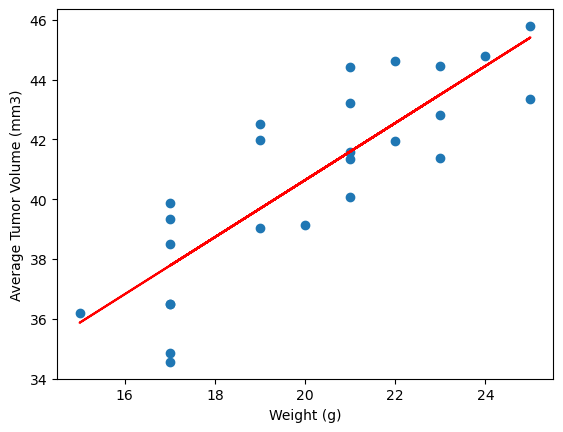

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_avg_tumor_vol = cap_weight_tumor.iloc[:,0]
cap_mouse_weight = cap_weight_tumor.iloc[:,1]
correlation = st.pearsonr(cap_avg_tumor_vol, cap_mouse_weight)
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_mouse_weight, cap_avg_tumor_vol)
regress_values = cap_mouse_weight * slope + intercept

plt.scatter(cap_mouse_weight, cap_avg_tumor_vol)
plt.plot(cap_mouse_weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()